# Time Series Analysis

Measurements are made at regular time interval,basically to understand the trend over time

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# Read the data
df1=pd.read_csv('AirPassengers.csv')

In [5]:
#check data types

df1.dtypes

Month          object
#Passengers     int64
dtype: object

In [8]:
# we are providing inputs to tell pandas that we are trying to work with time series.
df1=pd.read_csv('AirPassengers.csv',parse_dates=['Month'])    # parse_dates treated / read  as month not object 

In [9]:
df1.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [10]:
df1.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [11]:
# It is recommended that we make our time series reference as the index
df1=pd.read_csv('AirPassengers.csv',parse_dates=['Month'],index_col='Month')

In [12]:
df1.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
# we can conveniently do slicing i.e. obtain data for a specific time period
df1['1951-04-01':'1952-03-01']

,#Passengers
Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [14]:
# we can check values corresponding to a specific time point
df1.loc['1960-05-01']

#Passengers    472
Name: 1960-05-01 00:00:00, dtype: int64

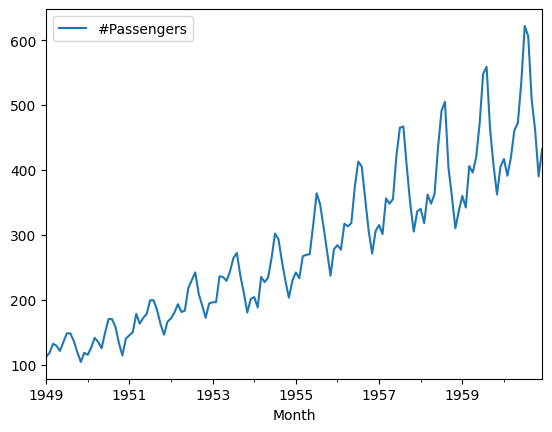

In [15]:
# plot the time series 
df1.plot()
plt.show()

Upward trend shown in this plot

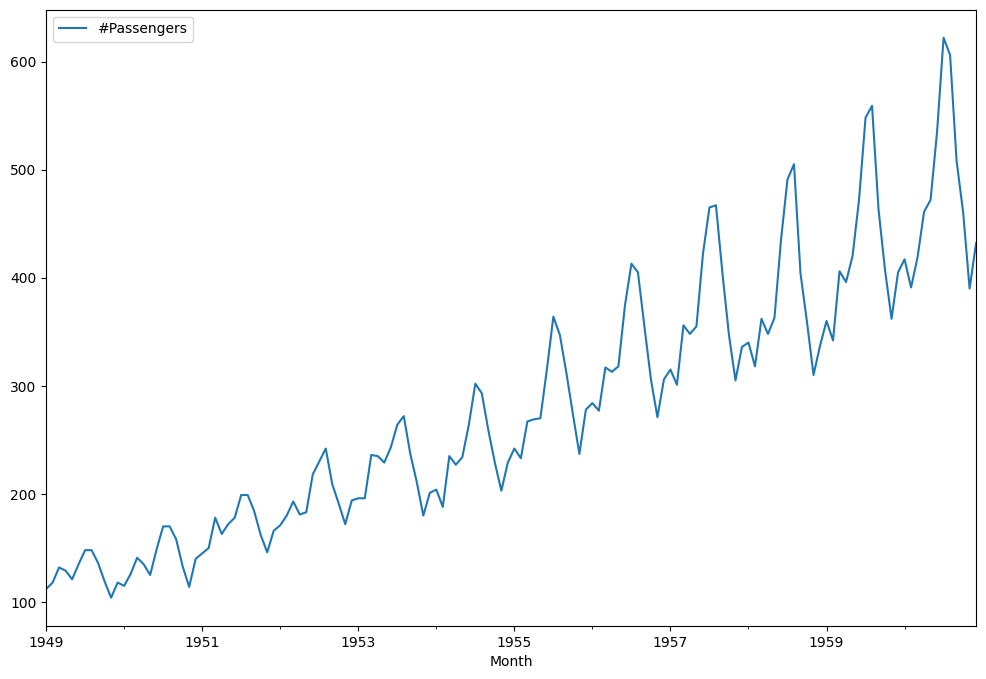

In [17]:
# increase the figure size
from pylab import rcParams
rcParams['figure.figsize']=12,8
df1.plot()
plt.show()

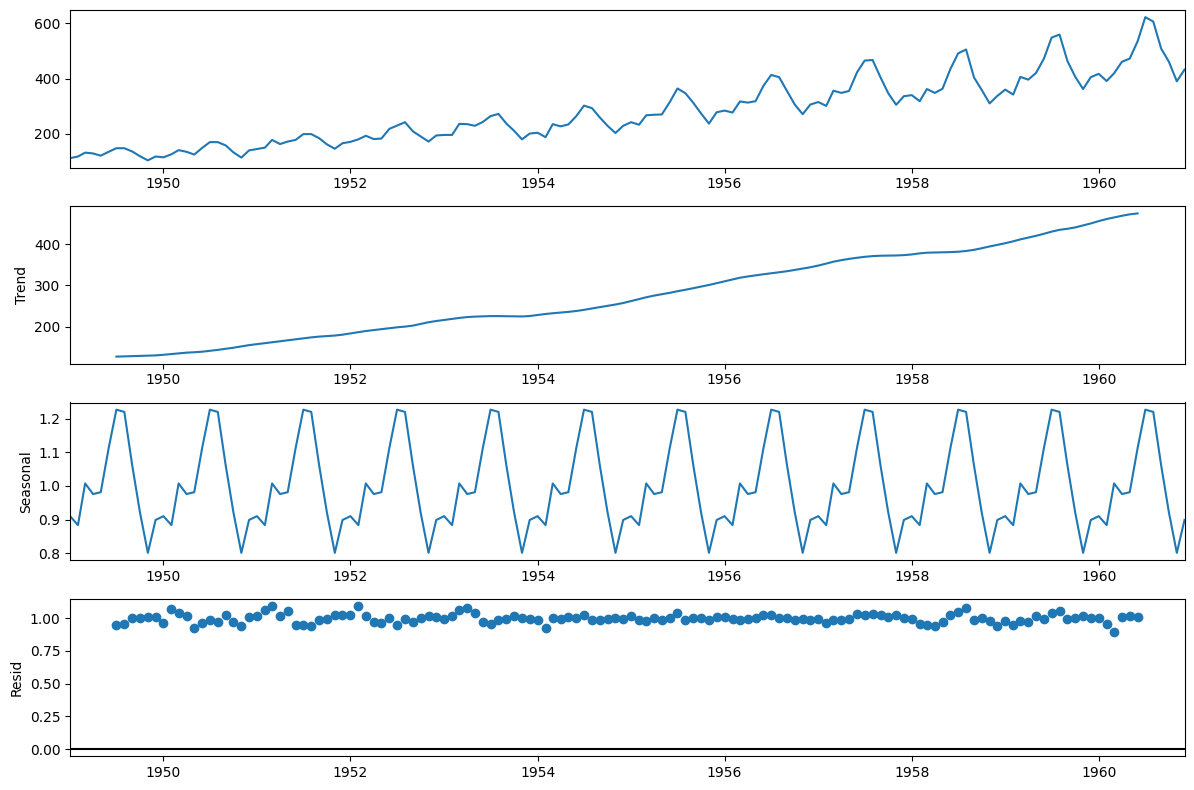

In [18]:
# Decompose the Time series  by multiplicatively model 
df1_mul_decompose=seasonal_decompose(df1,model='multiplicative')
df1_mul_decompose.plot()
plt.show()

you can transform of your multiplicative model into addictive model by using log

In [19]:
#lets try to do log transformation 
df1_log=df1.copy()

In [20]:
df1_log['Passengers']=np.log(df1)

In [21]:
df1_log.Passengers

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Passengers, Length: 144, dtype: float64

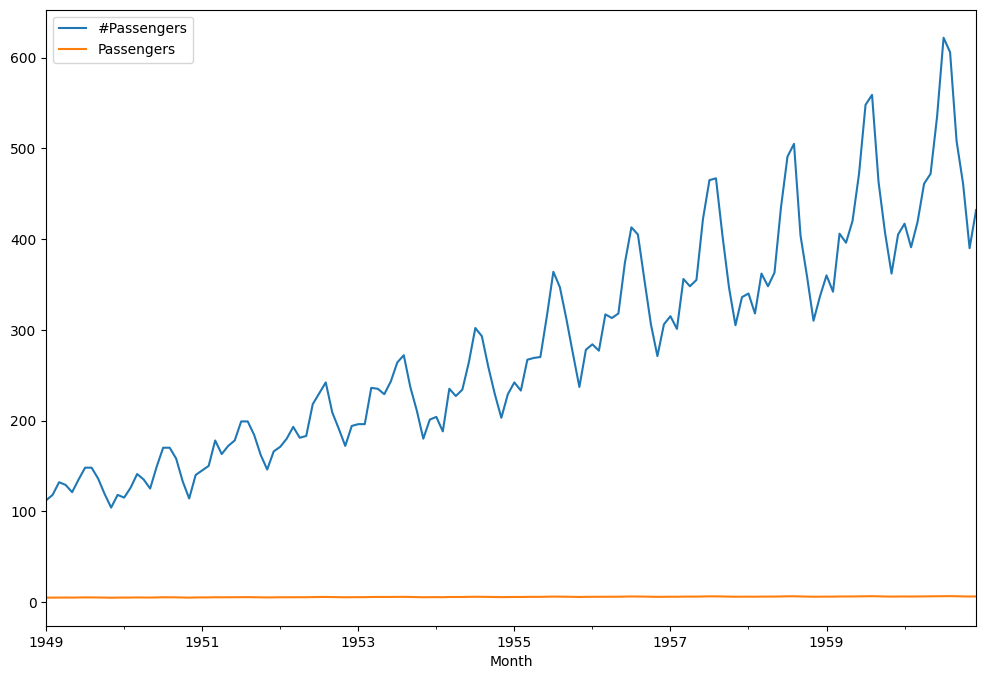

In [22]:
# visualize the log transformed series
df1_log.plot()
plt.show()

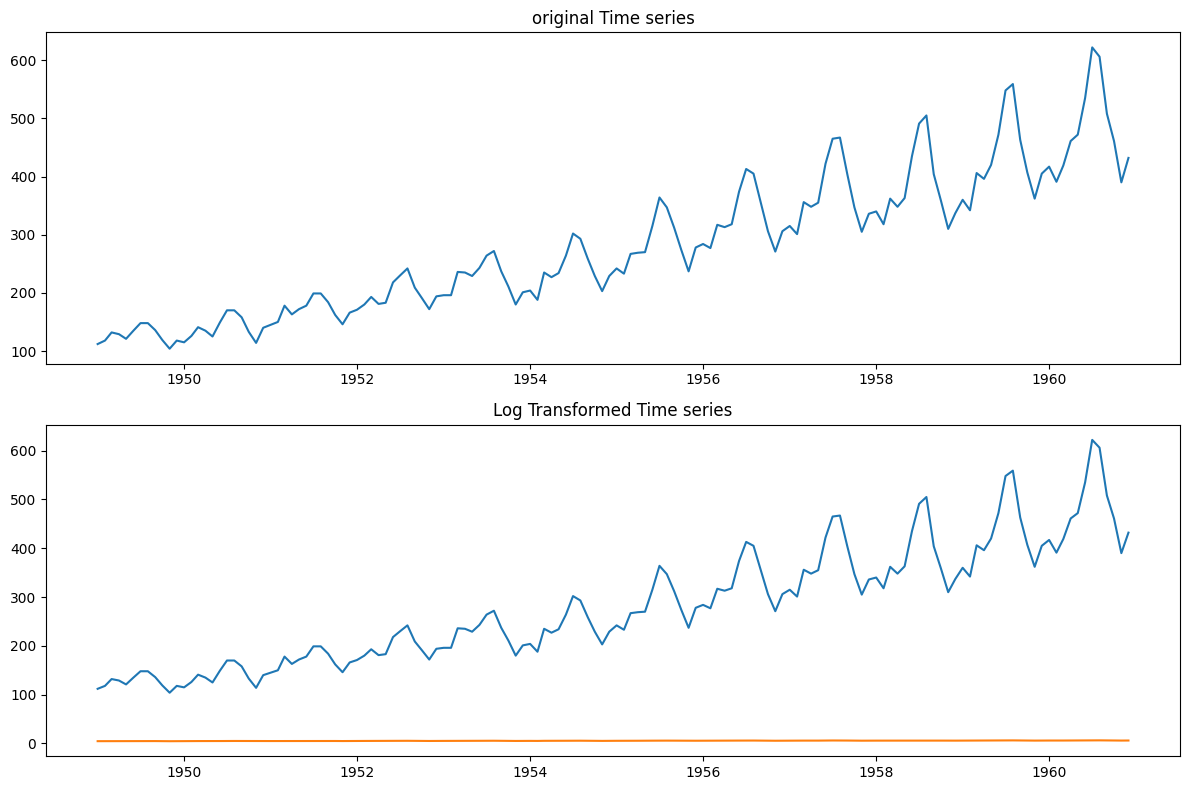

In [23]:
#Compare with the original series

plt.subplot(2,1,1)
plt.title('original Time series')
plt.plot(df1)

plt.subplot(2,1,2)
plt.title('Log Transformed Time series')
plt.plot(df1_log)
plt.tight_layout()

You can see that original time series gives upward trend but log transformed time series no upward trend